In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.model_selection import FeatureImportances

In [33]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [34]:
data = pd.read_csv('./sampled_events_id.csv', parse_dates=['timestamp'])
data['namespace_num'] = data['namespace'].fillna(-1)
data['length_delta_num'] = data['length_new'] - data['length_old']
data['timestamp2'] = pd.to_datetime(data['timestamp'], unit='s')
data['hour_num'] = data['timestamp2'].dt.hour
data['weekday_num'] = data['timestamp2'].dt.dayofweek
data['comment'] = data['comment'].fillna('no comment')
data['comment_hash_num'] = data['comment'].apply(hash)
data['comment_len_num'] = data['comment'].apply(len)
data['comment_word_num'] = data['comment'].apply(lambda x: len(x.split()))
data['comment_count_vec_num'] = count_vectorizer.fit_transform(data['comment']).sum(axis=1)
data['comment_tfidf_num'] = tfidf_vectorizer.fit_transform(data['comment']).sum(axis=1)

data['title_hash_num'] = data['title'].apply(hash)
data['title_len_num'] = data['title'].apply(len)
data['title_word_num'] = data['title'].apply(lambda x: len(x.split()))
data['title_count_vec_num'] = count_vectorizer.fit_transform(data['title']).sum(axis=1)
data['title_tfidf_num'] = tfidf_vectorizer.fit_transform(data['title']).sum(axis=1)

data['bot_num'] = data['bot'].apply(lambda x : 1 if x == True else 0)  # Extracts the month


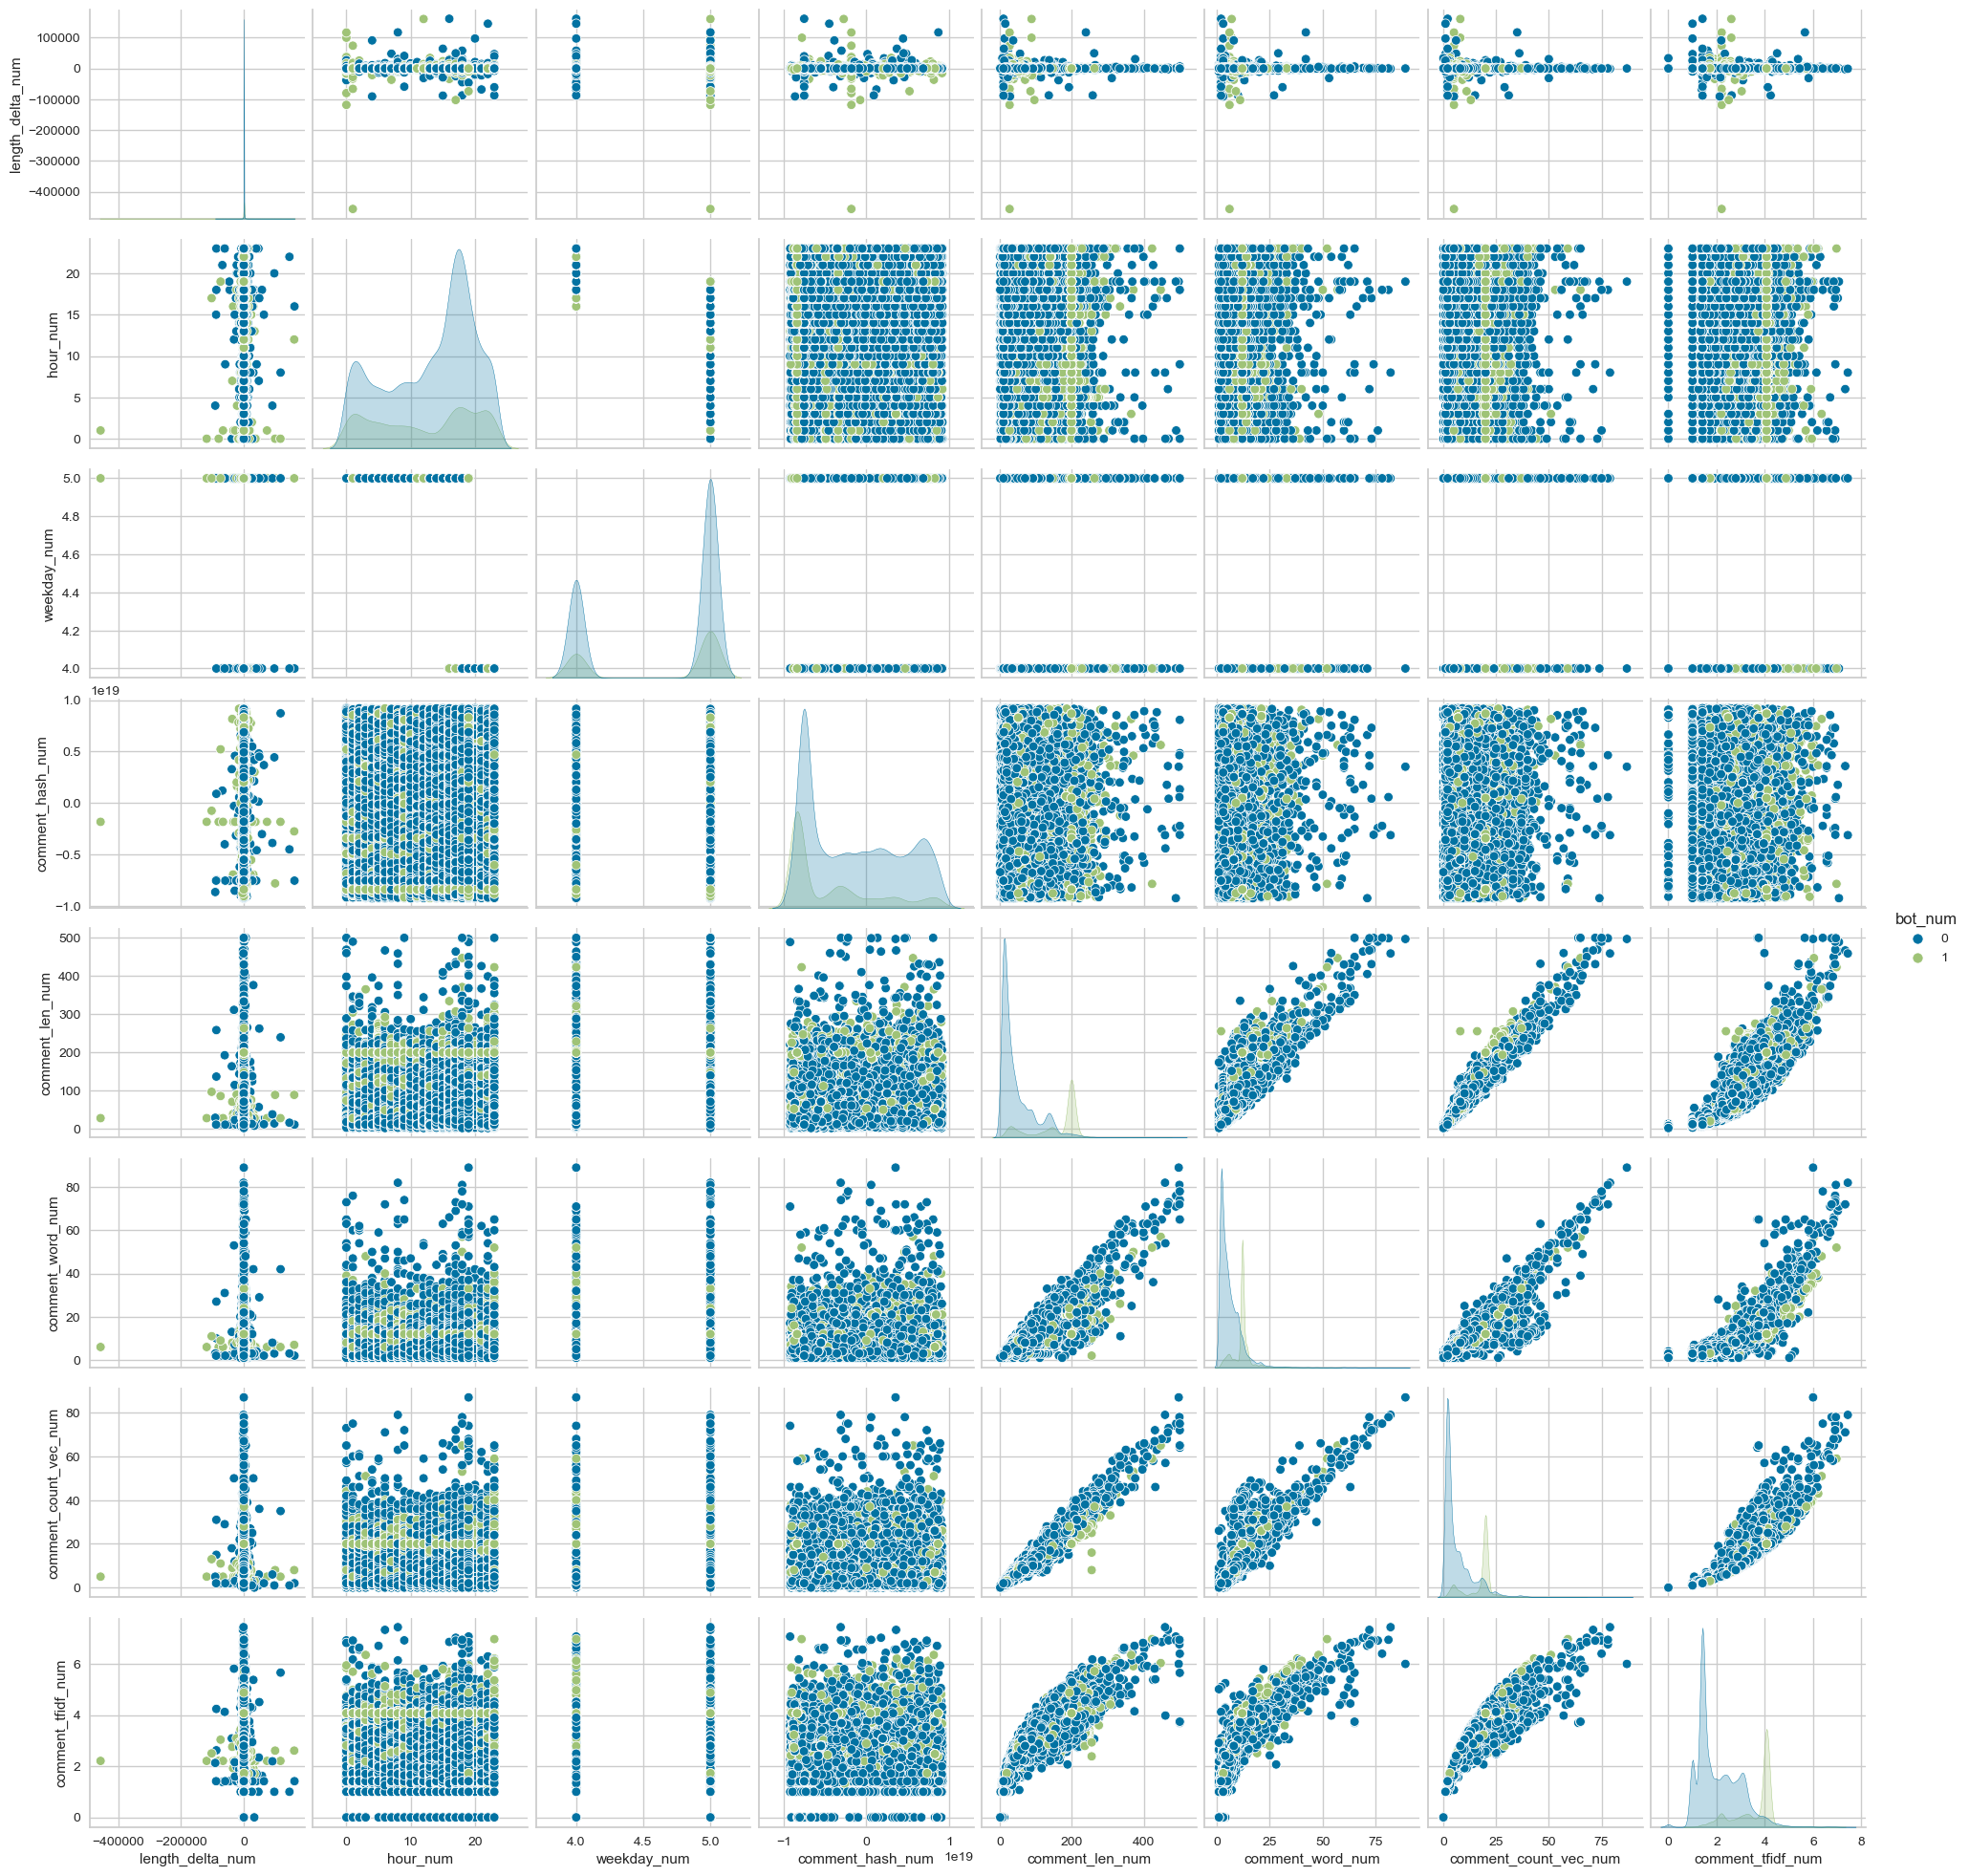

In [35]:
sns.pairplot(data[['length_delta_num', 'hour_num', 'weekday_num', 'comment_hash_num', 'comment_len_num', 'comment_word_num', 'comment_count_vec_num', 'comment_tfidf_num', 'bot_num']], hue='bot_num')

In [72]:
X = data[['length_delta_num', 'hour_num', 'weekday_num', 
          'comment_hash_num', 'comment_len_num', 'comment_word_num', 
          'comment_count_vec_num', 'comment_tfidf_num',
          'title_hash_num', 'title_len_num', 'title_word_num',
          'title_count_vec_num', 'title_tfidf_num'
          ]]
y = data['bot_num']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
clf = RandomForestClassifier(max_depth=6, n_estimators=100,random_state=0)
clf = clf.fit(X_train, y_train)

In [87]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 94.01%


/opt/miniconda3/envs/mmds-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


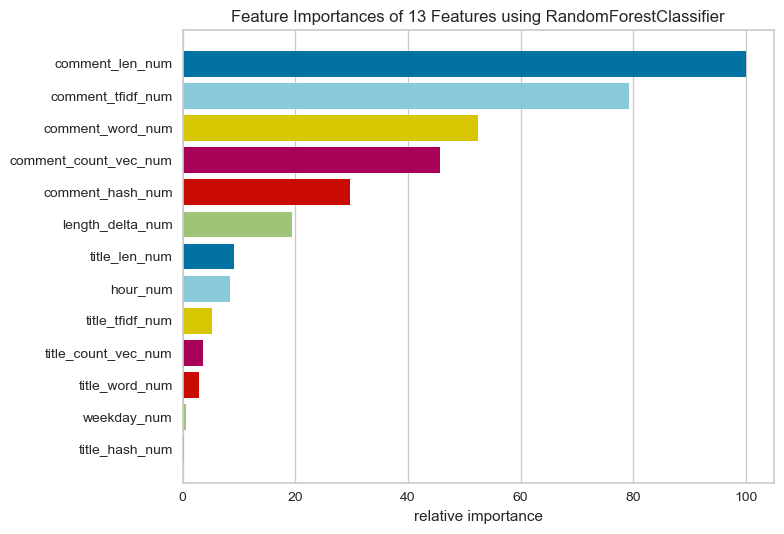

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [89]:
viz = FeatureImportances(clf)
viz.fit(X_train, y_train)
viz.show()